In [35]:
import pandas as pd

def prepareData(df):
    df['start_date'] = pd.to_datetime(df['start_date'])
    
    df['weekday'] = df['start_date'].dt.dayofweek
    df['hour'] = df['start_date'].dt.hour
    df['num_week'] = df['start_date'].dt.isocalendar().week
    ##convert the start_date to isodate
    df = df.drop(['start_station_code', 'end_date', 'end_station_code', 'duration_sec', 'is_member', 'Temperature_C'], axis=1)
    
    # Group by hour
    df_agrupado = df.groupby(['num_week','weekday', 'hour']).agg('first')
    columna = df.groupby(['num_week','weekday', 'hour']).count()['Description']
    
    df_agrupado['num_trips']= columna
    df_agrupado=df_agrupado.reset_index(level=[0,1,2])
    
    return df_agrupado

In [36]:
OD_2014_weather_agg = pd.read_csv('/Users/sayems_mac/BixiMatch/data/OD/OD_2014_weather.csv')
OD_2015_weather_agg = pd.read_csv('/Users/sayems_mac/BixiMatch/data/OD/OD_2015_weather.csv')
OD_2016_weather_agg = pd.read_csv('/Users/sayems_mac/BixiMatch/data/OD/OD_2016_weather.csv')
OD_2017_weather_agg = pd.read_csv('/Users/sayems_mac/BixiMatch/data/OD/OD_2017_weather.csv')

OD_2017_weather_agg.head()

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,Description,Temperature,Pressure,Wind_speed,Temperature_C
0,2017-04-15 00:00:00,7060,2017-04-15 00:31:00,7060,1841,1,few clouds,286.15,1027.0,4.0,13.00
1,2017-04-15 01:00:00,6007,2017-04-15 01:20:00,6127,1227,1,few clouds,283.82,1027.0,3.0,10.67
2,2017-04-15 01:00:00,6395,2017-04-15 01:09:00,6076,516,1,few clouds,283.82,1027.0,3.0,10.67
3,2017-04-15 01:00:00,6213,2017-04-15 01:08:00,6203,470,1,few clouds,283.82,1027.0,3.0,10.67
4,2017-04-15 01:00:00,6026,2017-04-15 01:31:00,6041,1849,1,few clouds,283.82,1027.0,3.0,10.67


In [37]:
OD_2017_weather_agg = prepareData(OD_2017_weather_agg);
OD_2017_weather_agg.tail()

,num_week,weekday,hour,start_date,Description,Temperature,Pressure,Wind_speed,num_trips
4773,46,2,19,2017-11-15 19:00:00,few clouds,278.80,1022.0,4.0,10
4774,46,2,20,2017-11-15 20:00:00,scattered clouds,279.15,1021.0,5.0,4
4775,46,2,21,2017-11-15 21:00:00,scattered clouds,279.15,1020.0,6.0,13
4776,46,2,22,2017-11-15 22:00:00,broken clouds,277.47,1020.0,5.0,6
4777,46,2,23,2017-11-15 23:00:00,broken clouds,276.47,1020.0,2.0,2


In [38]:
OD_2014_weather_agg = prepareData(OD_2014_weather_agg);
OD_2015_weather_agg = prepareData(OD_2015_weather_agg);
OD_2016_weather_agg = prepareData(OD_2016_weather_agg);

OD_2014_weather_agg.head()

,num_week,weekday,hour,start_date,Description,Temperature,Pressure,Wind_speed,num_trips
0,16,1,3,2014-04-15 03:00:00,light rain,288.05,1003.0,5.0,1
1,16,1,6,2014-04-15 06:00:00,light rain,287.31,1003.0,3.0,2
2,16,1,8,2014-04-15 08:00:00,light rain,286.64,1002.0,3.0,4
3,16,1,9,2014-04-15 09:00:00,light rain,286.74,1002.0,3.0,6
4,16,1,11,2014-04-15 11:00:00,overcast clouds,287.70,997.0,9.0,1


In [39]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(list(OD_2017_weather_agg['Description']) + list(OD_2016_weather_agg['Description']) + list(OD_2015_weather_agg['Description']) + list(OD_2014_weather_agg['Description']))

OD_2014_weather_agg['Description'] = le.transform(OD_2014_weather_agg['Description'])
OD_2015_weather_agg['Description'] = le.transform(OD_2015_weather_agg['Description'])
OD_2016_weather_agg['Description'] = le.transform(OD_2016_weather_agg['Description'])
OD_2017_weather_agg['Description'] = le.transform(OD_2017_weather_agg['Description'])

In [40]:
OD_2017_weather_agg.shape

OD_2014_weather_agg.to_csv('/Users/sayems_mac/BixiMatch/data/OD/OD_2014_weather_agg.csv', index=False)
OD_2015_weather_agg.to_csv('/Users/sayems_mac/BixiMatch/data/OD/OD_2015_weather_agg.csv', index=False)
OD_2016_weather_agg.to_csv('/Users/sayems_mac/BixiMatch/data/OD/OD_2016_weather_agg.csv', index=False)
OD_2017_weather_agg.to_csv('/Users/sayems_mac/BixiMatch/data/OD/OD_2017_weather_agg.csv', index=False)

In [41]:
import numpy as np

Xtst = []
ytst = []

Ntst = OD_2017_weather_agg.shape[0]

ahead = 24 #24 hours forecast
for k in range(720,Ntst-24):
    Xtst.append(np.hstack((
                OD_2017_weather_agg['num_trips'].values[k-720:k-1],           # last month usage
                OD_2017_weather_agg['Description'].values[k-24:k+24],    
                OD_2017_weather_agg['Temperature'].values[k-24:k+24],   
                OD_2017_weather_agg['Wind_speed'].values[k-24:k+24],
                OD_2017_weather_agg['num_week'].values[k],              
                OD_2017_weather_agg['weekday'].values[k],                 
                OD_2017_weather_agg['hour'].values[k],               
                1                     
            )).tolist())
    ytst.append(OD_2017_weather_agg['num_trips'].values[k+ahead].tolist() )

Xtst = np.array(Xtst)
ytst = np.array(ytst)

In [42]:
X = []
y = []

for datos_entrenamiento in [OD_2014_weather_agg, OD_2015_weather_agg, OD_2016_weather_agg]:
    for k in range(720, datos_entrenamiento.shape[0] - 24):
        X.append(np.hstack((
                    datos_entrenamiento['num_trips'].values[k-720:k-1],           
                    datos_entrenamiento['Description'].values[k-24:k+24],  
                    datos_entrenamiento['Temperature'].values[k-24:k+24],  
                    datos_entrenamiento['Wind_speed'].values[k-24:k+24], 
                    datos_entrenamiento['num_week'].values[k],             
                    datos_entrenamiento['weekday'].values[k],               
                    datos_entrenamiento['hour'].values[k],            
                    1                      
                )).tolist()  )
        y.append(datos_entrenamiento['num_trips'].values[k+ahead].tolist() );

X = np.array(X)
y = np.array(y)

In [43]:
print("Training features:", X.shape)
print("Test features:", Xtst.shape)

Training features: (11718, 867)
Test features: (4034, 867)


In [44]:
from sklearn.preprocessing import MinMaxScaler

minmaxx = MinMaxScaler(feature_range=(0,1));
minmaxx.fit(Xtst);

X_norm    = minmaxx.transform(X);
Xtst_norm = minmaxx.transform(Xtst);

minmaxy = MinMaxScaler(feature_range=(0,1));
minmaxy.fit(ytst.reshape(-1, 1));

y_norm    = minmaxy.transform(y.reshape(-1, 1));
ytst_norm = minmaxy.transform(ytst.reshape(-1, 1));

In [45]:
# Debugging: Check feature consistency
print("Training features:", X.shape)
print("Test features:", Xtst.shape)

# save the transformers

import pickle

pickle.dump(minmaxx, open('/Users/sayems_mac/BixiMatch/data/OD/minmaxx.pkl', 'wb'))
pickle.dump(minmaxy, open('/Users/sayems_mac/BixiMatch/model/minmaxy.pkl', 'wb'))


Training features: (11718, 867)
Test features: (4034, 867)


In [46]:
%%time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

clf = linear_model.Ridge (alpha = 1);
clf.fit(X_norm,y_norm);
yest_norm = clf.predict(Xtst_norm);
print("Mean squared error: %f" % (mean_squared_error(ytst_norm, yest_norm)));

Mean squared error: 0.020382
CPU times: user 1.36 s, sys: 51.5 ms, total: 1.41 s
Wall time: 243 ms


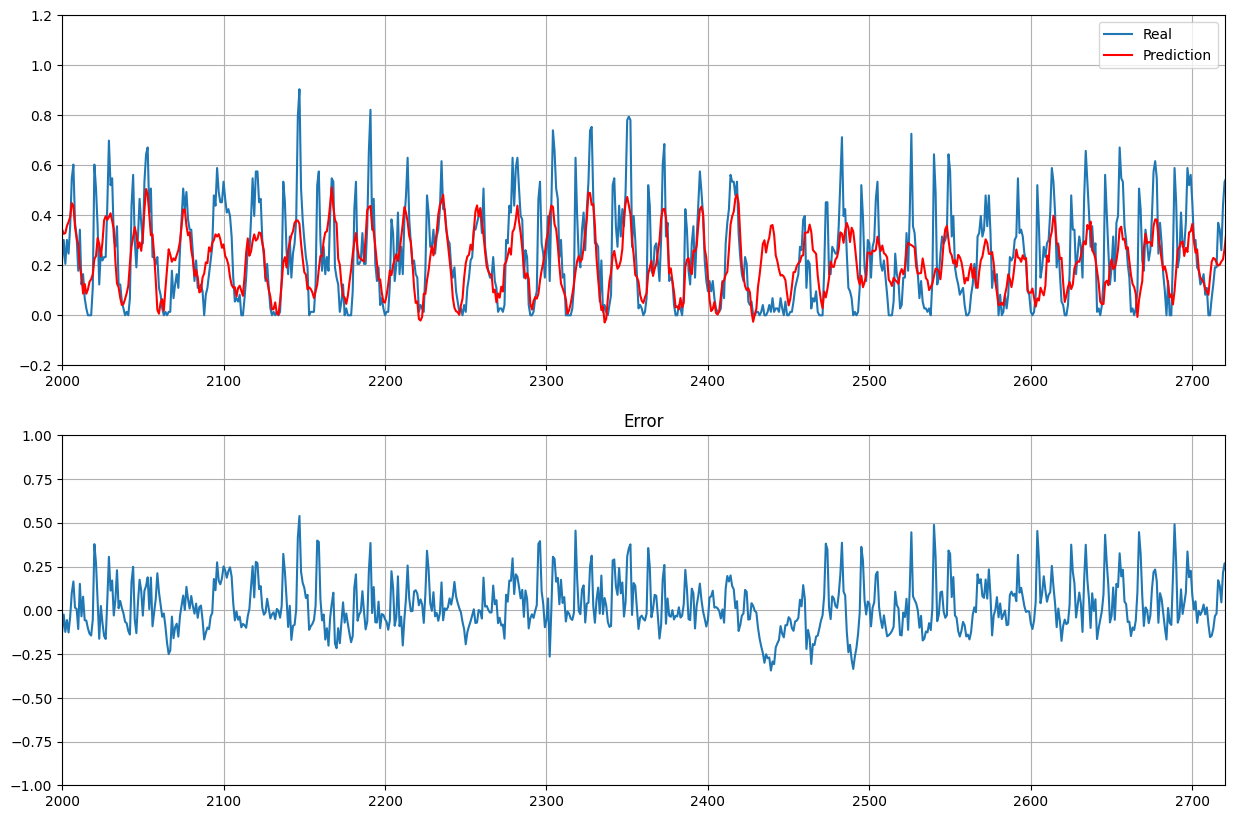

In [47]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(15,10));
plt.subplot(2,1,1);
plt.plot(ytst_norm);
plt.plot(yest_norm,'r');
plt.grid('on');
plt.legend(['Real',u'Prediction']);
plt.axis(xmin=2000,xmax=2720,ymin=-.2,ymax=1.2);

plt.subplot(2,1,2);
plt.plot(ytst_norm-yest_norm);
plt.title('Error');
plt.axis(ymin=-1,ymax=1);
plt.grid('on');
plt.axis(xmin=2000,xmax=2720,ymin=-1,ymax=1);

In [48]:
# Save the model

import pickle

filename = 'linear_model.sav'
pickle.dump(clf, open(filename, 'wb'))


In [49]:
from sklearn.metrics import mean_squared_error
# Load the model

loaded_model = pickle.load(open(filename
                                
                                , 'rb'))

yest_norm = loaded_model.predict(Xtst_norm);
print("Mean squared error: %f" % (mean_squared_error(ytst_norm, yest_norm)));


Mean squared error: 0.020382


In [50]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Example date for prediction (use a corresponding date in 2017)
predict_date = datetime(2017, 6, 14)  # Corresponding day/month as today in 2017



# Function to extract relevant historical data
def extract_historical_data(df, start_date, end_date):
    return df[(df['start_date'] >= start_date) & (df['start_date'] <= end_date)]

# Assuming OD_2017_weather_agg is your DataFrame with all data from 2017
# and it includes a 'date' column

s = predict_date - timedelta(days=530)  #
e = predict_date + timedelta(days=24)  # 24 hours forecast


historical_data = extract_historical_data(OD_2017_weather_agg,s, e)


# start index

start_index = 510
end_index = 510 + 24
# Prepare features for model (similar to your training setup)
X_test = []
for k in range(720, historical_data.shape[0] - 24):
    X_test.append(np.hstack((
        historical_data['num_trips'].values[k-720:k-1],           # last month usage
        historical_data['Description'].values[k-24:k+24],    
        historical_data['Temperature'].values[k-24:k+24],   
        historical_data['Wind_speed'].values[k-24:k+24],
        historical_data['num_week'].values[k],              
        historical_data['weekday'].values[k],                 
        historical_data['hour'].values[k],               
        1                     
    )).tolist())  

X_test = np.array(X_test)

# shape of the features

print("Test features:", X_test.shape)

# Normalize features
X_test_norm = minmaxx.transform(X_test)

# Predict

y_pred_norm = loaded_model.predict(X_test_norm)

# Denormalize prediction

y_pred = minmaxy.inverse_transform(y_pred_norm)


# print 24 hours forecast

print(y_pred[0:24])




Test features: (1125, 867)
[[19.66546938]
 [23.29794742]
 [26.10966239]
 [23.20878754]
 [24.84993546]
 [21.4332685 ]
 [19.61928389]
 [16.07491866]
 [12.40963663]
 [ 7.74694256]
 [ 2.905522  ]
 [ 2.95519422]
 [ 3.59597857]
 [ 3.53329657]
 [ 4.68626552]
 [ 4.25510675]
 [ 7.47980777]
 [10.50062145]
 [ 9.27078681]
 [10.24772399]
 [13.47528492]
 [22.13996877]
 [25.63134402]
 [22.83717874]]
